In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
original_df=pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\Machine Learning\spam.csv',encoding='latin-1')

In [3]:
df=df[['v1','v2']]

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lb=LabelEncoder()

In [6]:
df['v1']=lb.fit_transform(df['v1'])

In [7]:
df.rename(columns={'v1':'tags','v2':'msg'},inplace=True)

In [8]:
df

,tags,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df['msg']=df['msg'].apply(lambda x:x.lower())

In [10]:
df

,tags,msg
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [11]:
import nltk

In [12]:
df['word_count']=df['msg'].apply(lambda x :len(nltk.word_tokenize(x)))

In [13]:
df['sent_count']=df['msg'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [14]:
df

,tags,msg,word_count,sent_count
0,0,"go until jurong point, crazy.. available only ...",24,1
1,0,ok lar... joking wif u oni...,8,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,36,1
3,0,u dun say so early hor... u c already then say...,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",15,1
...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,35,4
5568,0,will ì_ b going to esplanade fr home?,9,1
5569,0,"pity, * was in mood for that. so...any other s...",15,2
5570,0,the guy did some bitching but i acted like i'd...,27,1


In [15]:
df['char_count']=df['msg'].apply(len)

In [16]:
from  nltk.corpus import stopwords
import string

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
from nltk.stem.porter import PorterStemmer

In [20]:
ps=PorterStemmer()

In [21]:
def main_method(obj):
    text =nltk.word_tokenize(obj)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    h=[]
    for i in y:
        if i not in stopwords.words('english') and string.punctuation:
            h.append(i)
            
            
    m=[]        
    for i in h:
        m.append(ps.stem(i))
            
    return " ".join(m)       
            
    

In [22]:
main_method(df['msg'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [23]:
df['msg']=df['msg'].apply(main_method)

In [24]:
df.describe()

,tags,word_count,sent_count,char_count
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,18.664752,1.912419,80.118808
std,0.340751,13.700582,1.435333,59.690841
min,0.000000,1.000000,1.000000,2.000000
25%,0.000000,9.000000,1.000000,36.000000
50%,0.000000,15.000000,1.000000,61.000000
75%,0.000000,27.000000,2.000000,121.000000
max,1.000000,216.000000,34.000000,910.000000


In [25]:
df

,tags,msg,word_count,sent_count,char_count
0,0,go jurong point crazi avail bugi n great world...,24,1,111
1,0,ok lar joke wif u oni,8,1,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,36,1,155
3,0,u dun say earli hor u c alreadi say,13,1,49
4,0,nah think goe usf live around though,15,1,61
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,35,4,161
5568,0,b go esplanad fr home,9,1,37
5569,0,piti mood suggest,15,2,57
5570,0,guy bitch act like interest buy someth els nex...,27,1,125


In [26]:
import seaborn as sns

<Axes: xlabel='tags', ylabel='count'>

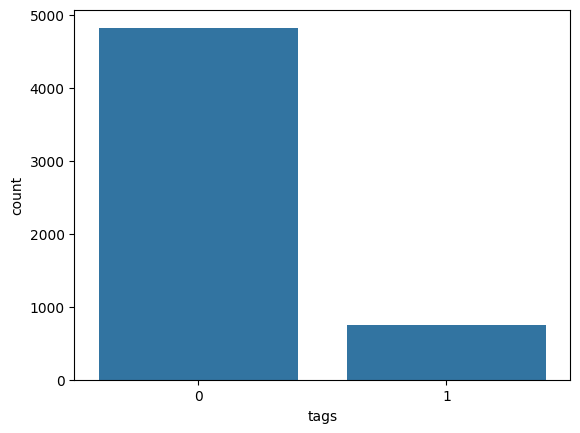

In [27]:
sns.countplot(x='tags',data=df)

In [28]:
import matplotlib.pyplot as plt 


[]

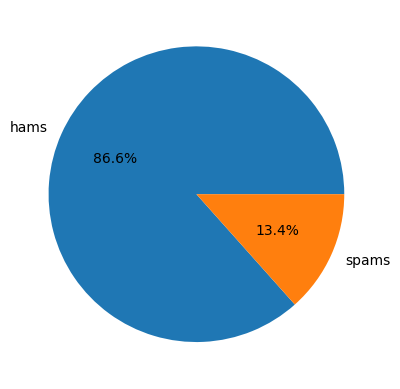

In [29]:
plt.pie(df['tags'].value_counts(),autopct='%1.1f%%',labels=['hams','spams'])
plt.plot()

(0.0, 100.0)

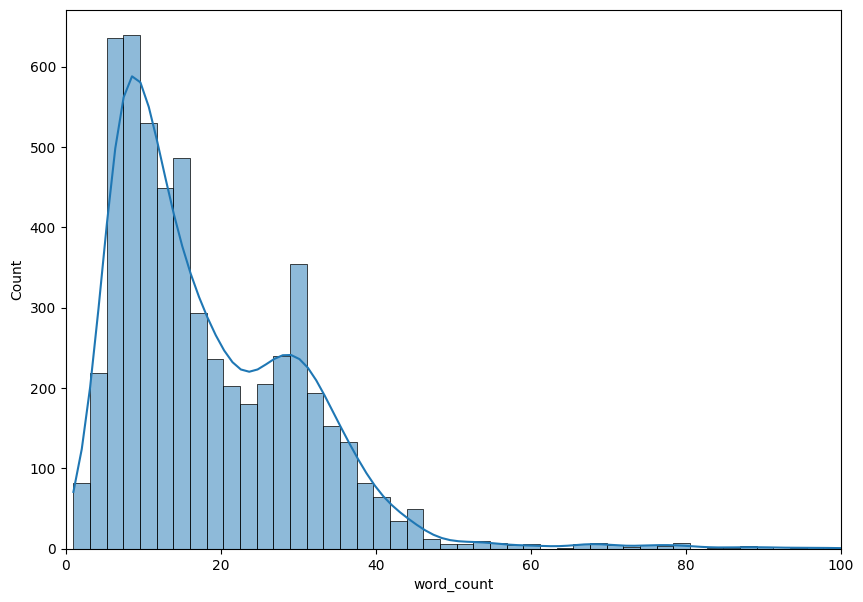

In [30]:

plt.figure(figsize=(10,7))
sns.histplot(x='word_count',data=df,kde=True,bins=100)
plt.xlim(0, 100)

<Axes: ylabel='word_count'>

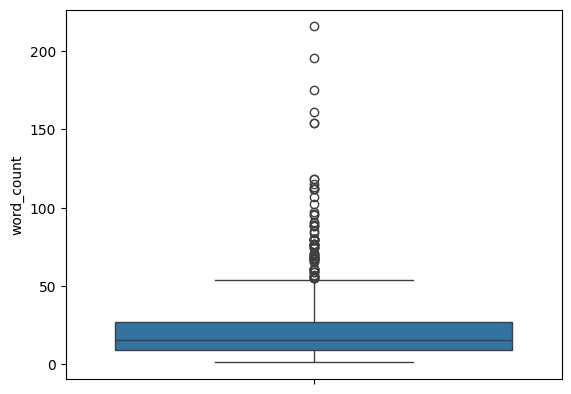

In [31]:
sns.boxplot(y='word_count',data=df)

In [32]:
df

,tags,msg,word_count,sent_count,char_count
0,0,go jurong point crazi avail bugi n great world...,24,1,111
1,0,ok lar joke wif u oni,8,1,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,36,1,155
3,0,u dun say earli hor u c alreadi say,13,1,49
4,0,nah think goe usf live around though,15,1,61
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,35,4,161
5568,0,b go esplanad fr home,9,1,37
5569,0,piti mood suggest,15,2,57
5570,0,guy bitch act like interest buy someth els nex...,27,1,125


In [43]:

#ham
random=[]
for i in df[df['tags']==0]['msg'].tolist():
    for word in i.split():
        random.append(word)
        
 
        
        
        

In [34]:
original_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [44]:
random

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [45]:
from collections import Counter

In [48]:
pd.DataFrame(Counter(random).most_common(30))

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


In [52]:
# spam 
random2=[]

for i in df[df['tags']==1]['msg'].tolist():
    for j in i.split():
        random2.append(j)
        

In [54]:
from collections import Counter

In [58]:
pd.DataFrame(Counter(random2).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


In [59]:
# for visualization of most frequently used words 

In [61]:
from wordcloud import WordCloud

In [69]:
wc=WordCloud(height=500,width=500,min_font_size=5,background_color='white')

In [70]:
spam_wc=wc.generate(df[df['tags']==1]['msg'].str.cat(sep=' '))

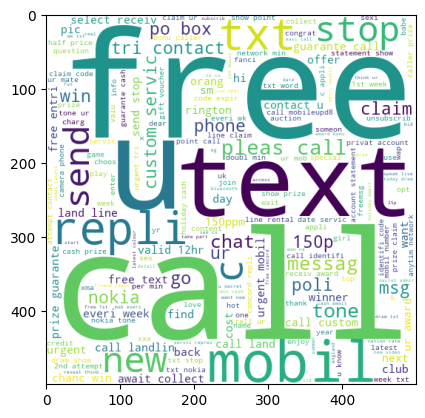

In [71]:
plt.imshow(spam_wc)

In [72]:
from wordcloud import WordCloud

In [79]:
wc =WordCloud(width=500,height=500,min_font_size=10,background_color='black')

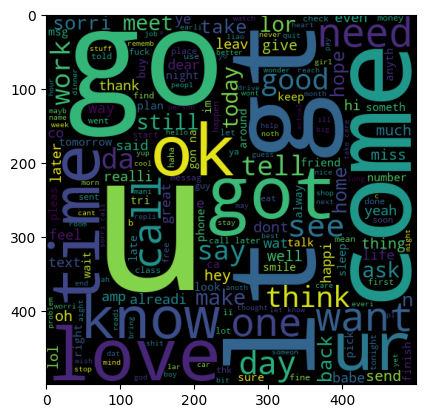

In [80]:
plt.imshow(wc.generate(df[df['tags']==0]['msg'].str.cat(sep=" ")))

In [ ]:
sns.barplot()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
cv=CountVectorizer()

In [84]:
X=cv.fit_transform(df['msg']).toarray()

In [85]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
y=df['tags']

In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [114]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [92]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [103]:
X_train.shape

(4457, 6708)

In [115]:
gb.fit(X_train,y_train)
mb.fit(X_train,y_train)
bb.fit(X_train,y_train)

BernoulliNB()

In [116]:
gb.predict(X_test)
mb.predict(X_test)
bb.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [118]:
print(accuracy_score(gb.predict(X_test),y_test))
print(precision_score(gb.predict(X_test),y_test))
print(precision_score(gb.confusion_matrix(X_test),y_test))

0.873542600896861
0.8291139240506329


AttributeError: 'GaussianNB' object has no attribute 'confusion_matrix'

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lg=LogisticRegression()

In [123]:
lg.fit(X_train,y_train)

LogisticRegression()

In [126]:
f=lg.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score,precision_score,precision_score

In [127]:
accuracy_score(f,y_test)

0.9713004484304932